# 🚀 Project

* * * 

### Icons used in this notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive excersise. We'll work through these in the workshop!<br>
💭 **Reflection**: Helping you think about programming.<br>
⚠️ **Warning**: Heads-up about tricky stuff or common mistakes.<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
🎬 **Demo**: Showing off something more advanced – so you know what Python can be used for!<br>

### Learning Objectives
1. [🚀 Project](#project)

# 🚀 Project

### Data: California Health Interview Survey
In this section, we will go through an example project. The California Health Interview Survey (CHIS) is the nation's largest state health survey and a critical source of data on Californians as well as on the state's various racial and ethnic groups.

We will bring together the basic programming, loading data, and statistical analysis/visualization techniques from this workshop to analyze this data. 

First, let's import the packages to use in this analysis:

In [1]:
import numpy as np
import pandas as pd
import os

## 1. Getting the data

Before we can get our data, you should know something more about **filepaths**. 

A filepath is the location of a file on your system. There are two kinds of filepaths:

* **absolute**: The filepath from the top level directory (or folder).
    * For Macs, these begin with a forward slash, followed by folders separated by a **forward slash**. E.g. `/Users/[USERNAME]/directory/subdirectory/file`.
    * For Windows, these begin with a backward slash or, more commonly, a volume, e.g. `C:\Documents\directory\subdirectory\file`. Note the **backward slash** to separate folders.
* **relative**: The filepath relative to the current working directory (i.e. notebook location). Common locations include:
    * File in same folder: `./file` or `file` (`.` means 'here').
    * Subfolder: `subfolder/file`.
    * Higher folder: `../sisterfolder/file` (`..` means 'go up one level in the directory').

When you are figuring out what filepath to use, you can use `os.listdir([PATH])` to list all subdirectories in a path. For example, let's see what directories are available to us in the current folder (noted with a dot `.`).

🔔 **Question**: In this current folder we're checking out, which items are folders and which are files? (**Hint:** You can double check by looking at the files in JupyterLab/ Jupyter Notebook).

In [ ]:
import os
os.listdir('.')

Looking up the items in the folder after moving up one level works like this:

In [ ]:
os.listdir('../')

### 1.1 Find the Data

Use `os.listdir()` to see the files in the "chis_data" folder, which is in the "data" folder, which is in the main "Python-Fundamentals" folder.

💡 **Tip**: Remember how to move up in the folder structure? `../../` goes up two folders!

💡 **Tip**: You can use Jupyter Lab's File Browser to the left of your screen to get a sense of where the "chis_data" folder is.

In [10]:
# YOUR CODE HERE

os.listdir('../../data/chis_data')


['chi_esp.csv', 'chi_eng.csv', 'chi_other.csv']

### 1.2 Load in a single file

We have 3 csv files based on the language in which the Health Interview was held.
L
et's load in one of these CSV files.

1. Read in the `chis_esp.csv` file as a `pandas` object.
2. How many rows are there? How many columns?

In [12]:
import pandas as pd

# Load in file
chis_esp = pd.read_csv('../../data/chis_data/chis_esp.csv')

### 1.3 Load in Multiple Files

We want to combine our csv files using a loop.
However, we notice that there is a `.txt` file in the directory, which isn't a `pandas` dataframe. This will cause an error in the dataframe processing, so let's use an `if` statement to filter out the `.txt` extension. 

Slice the last 3 characters of the `test_csv` variable and use the equality operator (`==`) to return `True`.

💡 **Tip**: Recall slicing the last elements of a list. For instance, use `some_list[-2:]` to get the last two items.

In [17]:
test_csv = 'chis_esp.csv' # Expression should evaluate True

# YOUR CODE HERE
test_csv[-3:] == 'csv'



True

Now that we have an expression, let's create a for-loop to check if it works over the files in our folder. 

In [37]:
directory = '../../data/chis_data'
for file in os.listdir(directory):
    if file[-3:] == 'csv': # Fill in the blank to filter for files ending with `.csv`
        print(file)

chis_other.csv
chis_eng.csv
chis_esp.csv


## 🥊 Challenge: Putting it all together

We've got most of the pieces. Now let's put the puzzle together:
1) Initialize an *accumulator* list called `df_list`.
2) Reuse the `for`-loop we just created to loop over the csv files in the right folder. But in the final line, instead of `print`ing the file, read it as a DataFrame and `append` the output to our `df_list` list.

⚠️ Warning: When calling `read_csv()`, you will need to input the **full filepath**, or the file will not be found!

In [76]:
# YOUR CODE HERE
df_list = []
directory = '../../data/chis_data'
for file in os.listdir(directory):
    if file[-3:] == 'csv': # Fill in the blank to filter for files ending with `csv`
        df = pd.read_csv(directory + '/' + file)
        df_list.append(df)        


Finally, look up the [documentation for Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html), and see if you can find a function that **concatenates** the list of DataFrames we have now. We'll save the concatenated list in a variable called `df`.

In [77]:
# YOUR CODE HERE
df = pd.concat(df_list)


🔔 **Question**: Let's take a look at the final data frame.

1. How many rows and columns are there in the total dataframe?
2. How many numeric columns are there in the dataset?
3. Which columns look interesting to you?

In [78]:
# YOUR CODE HERE
print(df.shape)
df.head()

(22160, 20)


,ethnicity,age,gender,edu_attainment,fam_size,general_health,diabetes,high_blood_pr,overweight,doctor_visits_lastyear,fruit_perweek,veg_perweek,cur_insured,feel_left_out,difficult_concentrating,poverty_level,household_tenure,feel_safe_neighborhood,voting_freq_presid,interview_language
0,"ASIAN ONLY, NH",75-79 YEARS,FEMALE,NO FORMAL EDUCATION OR GRADE 1-8,1,VERY GOOD,NO,YES,YES,5 TIMES,21,21,YES,HARDLY EVER,NO,0-99% FPL,RENT/SOME OTHER ARRANGEMENT,MOST OF THE TIME,ALWAYS,OTHER LANGUAGE
1,"ASIAN ONLY, NH",70-74 YEARS,FEMALE,NO FORMAL EDUCATION OR GRADE 1-8,1,FAIR,NO,YES,NO,2 TIMES,7,14,YES,SOME OF THE TIME,NO,0-99% FPL,RENT/SOME OTHER ARRANGEMENT,MOST OF THE TIME,INAPPLICABLE,OTHER LANGUAGE
2,"ASIAN ONLY, NH",55-59 YEARS,MALE,GRADE 12/H.S. DIPLOMA,2,POOR,YES,YES,YES,9-12 TIMES,0,7,NO,INAPPLICABLE,NO,200-299% FPL,RENT/SOME OTHER ARRANGEMENT,ALL OF THE TIME,ALWAYS,OTHER LANGUAGE
3,"ASIAN ONLY, NH",75-79 YEARS,MALE,GRADE 9-11,2,GOOD,YES,NO,NO,5 TIMES,7,14,YES,HARDLY EVER,NO,200-299% FPL,OWN,ALL OF THE TIME,NEVER,OTHER LANGUAGE
4,"ASIAN ONLY, NH",75-79 YEARS,MALE,BA OR BS DEGREE/SOME GRAD SCHOOL,2,GOOD,NO,YES,YES,5 TIMES,5,7,YES,HARDLY EVER,NO,100-199% FPL,RENT/SOME OTHER ARRANGEMENT,MOST OF THE TIME,SOMETIMES,OTHER LANGUAGE


## 2. Data Processing

### 2.1 Exploratory Data Analysis (EDA)

Now let's do some Exploratory Data Analysis. One thing we will want to do is count values of interesting features. 
Value counts


In [86]:
# YOUR CODE HERE
df['feel_left_out'].value_counts(normalize=True)


INAPPLICABLE        0.618457
HARDLY EVER         0.298375
SOME OF THE TIME    0.071119
OFTEN               0.011688
PROXY SKIPPED       0.000361
Name: feel_left_out, dtype: float64


One thing we will want to do is look at potential correlations between features that we think might be interesting to pursue further. 

Pick two of them, then 



### 2.2 Cross-tabulate
We can use the `crosstab()` method to cross-tabulate poverty level and health. 

In [48]:
pd.crosstab(index=df['poverty_level'], columns=df['general_health'])

ethnicity,"AFRICAN AMERICAN ONLY, NOT HISPANIC","AMERICAN INDIAN/ALASKAN NATIVE ONLY, NH","ASIAN ONLY, NH",HISPANIC,OTHER/TWO OR MORE RACES,"WHITE, NON-HISPANIC (NH)"
poverty_level,,,,,,
0-99% FPL,135,14,222,674,65,815
100-199% FPL,142,22,276,921,76,1386
200-299% FPL,111,17,288,623,61,1700
300% FPL AND ABOVE,450,48,1762,1826,348,10178


Look at the crosstab [documentation](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) and look for aruments that allow you to get the normalized values, and include subtotals:

In [51]:
pd.crosstab(index=df['poverty_level'], columns=df['general_health'],
            normalize='index',margins=True)


general_health,EXCELLENT,FAIR,GOOD,POOR,VERY GOOD
poverty_level,,,,,
0-99% FPL,0.119481,0.211429,0.339221,0.079481,0.250390
100-199% FPL,0.119022,0.203684,0.340418,0.059511,0.277365
200-299% FPL,0.134286,0.140357,0.342857,0.032143,0.350357
300% FPL AND ABOVE,0.222078,0.073091,0.269025,0.014919,0.420887
All,0.188944,0.110244,0.293547,0.028384,0.378881


In [72]:
df['general_health'] = df['general_health'].replace({'EXCELLENT':5, 
                                                     'VERY GOOD':4, 'GOOD':3,
                                                     'FAIR':2, 'POOR':1})

In [74]:
df['poverty_level'] = df['poverty_level'].replace({'0-99% FPL':1, 
                                                     '100-199% FPL':2, '200-299% FPL':3,
                                                     '300% FPL AND ABOVE':4})

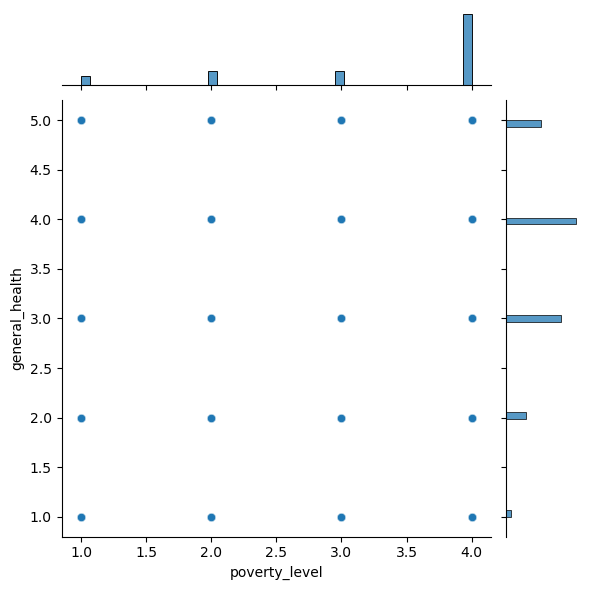

In [75]:
import seaborn as sns
j_plot = sns.jointplot(x = 'poverty_level', y = 'general_health', data = df, alpha = .5)

### 2.3 `Group_by`

In [64]:
# vegetable eating, grouped by tenure
df["veg_perweek"].groupby(df["general_health"]).mean().sort_values()


general_health
POOR          7.871224
FAIR          8.455997
GOOD          9.234896
VERY GOOD    10.466174
EXCELLENT    11.824218
Name: veg_perweek, dtype: float64

In [ ]:
# DUMMIES

In [56]:
pov_health = pd.get_dummies(data=df, columns=['poverty_level','general_health'])

In [ ]:
# Correlations?

In [57]:
pov_health.corr()

,fam_size,fruit_perweek,veg_perweek,poverty_level_0-99% FPL,poverty_level_100-199% FPL,poverty_level_200-299% FPL,poverty_level_300% FPL AND ABOVE,general_health_EXCELLENT,general_health_FAIR,general_health_GOOD,general_health_POOR,general_health_VERY GOOD
fam_size,1.000000,0.056616,0.076493,-0.007738,0.008135,-0.014137,0.008786,0.067198,-0.056494,-0.024851,-0.050623,0.022906
fruit_perweek,0.056616,1.000000,0.532069,0.004022,-0.015304,-0.000665,0.008843,0.055461,-0.020875,-0.040391,-0.016919,0.012429
veg_perweek,0.076493,0.532069,1.000000,-0.023090,-0.033538,-0.015586,0.048244,0.081899,-0.054697,-0.051709,-0.036206,0.030159
poverty_level_0-99% FPL,-0.007738,0.004022,-0.023090,1.000000,-0.117849,-0.117298,-0.429144,-0.054730,0.099648,0.030935,0.094899,-0.081696
poverty_level_100-199% FPL,0.008135,-0.015304,-0.033538,-0.117849,1.000000,-0.145307,-0.531618,-0.068247,0.113994,0.039326,0.071615,-0.079957
poverty_level_200-299% FPL,-0.014137,-0.000665,-0.015586,-0.117298,-0.145307,1.000000,-0.529133,-0.053100,0.036566,0.041180,0.008607,-0.022361
poverty_level_300% FPL AND ABOVE,0.008786,0.008843,0.048244,-0.429144,-0.531618,-0.529133,1.000000,0.117765,-0.165052,-0.074921,-0.112815,0.120479
general_health_EXCELLENT,0.067198,0.055461,0.081899,-0.054730,-0.068247,-0.053100,0.117765,1.000000,-0.169896,-0.311127,-0.082496,-0.376969
general_health_FAIR,-0.056494,-0.020875,-0.054697,0.099648,0.113994,0.036566,-0.165052,-0.169896,1.000000,-0.226902,-0.060164,-0.274919
general_health_GOOD,-0.024851,-0.040391,-0.051709,0.030935,0.039326,0.041180,-0.074921,-0.311127,-0.226902,1.000000,-0.110177,-0.503455


## 🥊 Challenge: Your turn!

Take some time to explore features and relationship based on the skills you built.


## Writing Files

Finally, a `pd.DataFrame` can be exported to a `.csv` (or other filetype) using `df.to_csv()`. This is a method function built-in to every data frame.

🔔 **Question**:  Where does `airlines_sentiment.csv` get saved? What if you wanted to save it to the "data" directory?

In [ ]:
SOMETHING.to_csv('SOPMETHING.csv') 

# 🎉 Well done!

**This concludes Python Fundamentals II!**

Today's project took us through importing multiple csv files, data manipulation, and some basic visualizations and analysis of data. 

If you were working on this dataset, what would you potentially do next? It could be either an analysis, a new feature to include, a visualization that might help represent the data, etc.

### 💡 Tip: More workshops!

D-Lab teaches workshops that allow you to practice more with DataFrames and visualization.

- To learn more about data wrangling, check out D-Lab's [Python Data Wrangling workshop](https://github.com/dlab-berkeley/Python-Data-Wrangling).
- To learn more about data visualization, check out D-Lab's [Python Data Visualization workshop](https://github.com/dlab-berkeley/Python-Data-Visualization).